In [1]:
import pandas as pd

df1 = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='\t')

In [2]:
df1.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
df1.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [6]:
df1.shape[0]

4622

In [7]:
df1.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [8]:
df1.index

RangeIndex(start=0, stop=4622, step=1)

In [10]:
df1

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [13]:
c = df1.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'],ascending=False)
c.head()

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [15]:
c = df1.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head()

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42


In [26]:
dollar = lambda x: float(x[1:-1])
df1.item_price = df1.item_price.apply(dollar)
revenue = (df1['quantity']*df1['item_price']).sum()
print(revenue)

39237.02


In [28]:
filtered = df1.drop_duplicates(['item_name','quantity'])

In [29]:
one_prod = filtered[filtered.quantity == 1]

In [30]:
price_per_item = one_prod[['item_name', 'item_price']]

In [31]:
price_per_item.sort_values(by = "item_price", ascending = False)

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
738,Veggie Soft Tacos,11.25
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25


In [32]:
df1.sort_values(by='item_price',ascending=False).head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


In [34]:
df1[df1.item_name == "Veggie Salad Bowl"]

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


In [35]:
df1

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [37]:
pd.unique(df1['item_name'])

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [38]:
df1['item_price'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

In [44]:
df1['item_price'].min()

1.09

In [40]:
df1['item_price'].max()

44.25

In [41]:
df1['item_price'].mean()

7.464335785374397

In [42]:
df1['item_price'].std()

4.245557197940349

In [45]:
df1['item_price'].count()

4622

In [49]:
type(df1.choice_description)

pandas.core.series.Series

In [50]:
df1.choice_description.values

array([nan, '[Clementine]', '[Apple]', ...,
       '[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]',
       '[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]',
       '[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Lettuce]]'],
      dtype=object)

In [62]:
cols = df1.choice_description.str.split(",",expand=True)
cols[0]
type(cols[0])

pandas.core.series.Series

In [63]:
df1['new1'] = cols[0]

In [64]:
df1

,order_id,quantity,item_name,choice_description,item_price,new_choice0,new_choice1,new_choice2,new_choice3,new_choice4,new_choice5,new_choice6,new_choice7,new_choice8,new_choice9,new1
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Izze,[Clementine],3.39,[Clementine],None,None,None,None,None,None,None,None,None,[Clementine]
2,1,1,Nantucket Nectar,[Apple],3.39,[Apple],None,None,None,None,None,None,None,None,None,[Apple]
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,[Tomatillo-Red Chili Salsa (Hot),[Black Beans,Rice,Cheese,Sour Cream]],None,None,None,None,None,[Tomatillo-Red Chili Salsa (Hot)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,[Fresh Tomato Salsa,[Rice,Black Beans,Sour Cream,Cheese,Lettuce,Guacamole]],None,None,None,[Fresh Tomato Salsa
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,[Fresh Tomato Salsa,[Rice,Sour Cream,Cheese,Lettuce,Guacamole]],None,None,None,None,[Fresh Tomato Salsa
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,[Fresh Tomato Salsa,[Fajita Vegetables,Pinto Beans,Guacamole,Lettuce]],None,None,None,None,None,[Fresh Tomato Salsa
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,[Fresh Tomato Salsa,[Fajita Vegetables,Lettuce]],None,None,None,None,None,None,None,[Fresh Tomato Salsa


In [70]:
df1.drop(columns='new1')

,order_id,quantity,item_name,choice_description,item_price,new_choice0,new_choice1,new_choice2,new_choice3,new_choice4,new_choice5,new_choice6,new_choice7,new_choice8,new_choice9
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Izze,[Clementine],3.39,[Clementine],None,None,None,None,None,None,None,None,None
2,1,1,Nantucket Nectar,[Apple],3.39,[Apple],None,None,None,None,None,None,None,None,None
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,[Tomatillo-Red Chili Salsa (Hot),[Black Beans,Rice,Cheese,Sour Cream]],None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,[Fresh Tomato Salsa,[Rice,Black Beans,Sour Cream,Cheese,Lettuce,Guacamole]],None,None,None
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,[Fresh Tomato Salsa,[Rice,Sour Cream,Cheese,Lettuce,Guacamole]],None,None,None,None
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,[Fresh Tomato Salsa,[Fajita Vegetables,Pinto Beans,Guacamole,Lettuce]],None,None,None,None,None
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,[Fresh Tomato Salsa,[Fajita Vegetables,Lettuce]],None,None,None,None,None,None,None


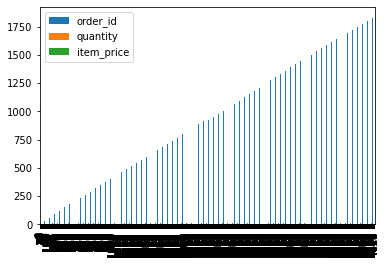

In [67]:
%matplotlib inline
df1.plot(kind='bar')

In [69]:
df1.loc[[0, 10], :]

,order_id,quantity,item_name,choice_description,item_price,new_choice0,new_choice1,new_choice2,new_choice3,new_choice4,new_choice5,new_choice6,new_choice7,new_choice8,new_choice9,new1
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,5,1,Chips and Guacamole,NaN,4.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df1.loc[5, ['item_name', 'choice_description', 'item_price']]

item_name                                                  Chicken Bowl
choice_description    [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...
item_price                                                        10.98
Name: 5, dtype: object

In [74]:
df1.loc[[0, 10, 400], :]

,order_id,quantity,item_name,choice_description,item_price,new_choice0,new_choice1,new_choice2,new_choice3,new_choice4,new_choice5,new_choice6,new_choice7,new_choice8,new_choice9,new1
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,5,1,Chips and Guacamole,NaN,4.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,174,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25,[Roasted Chili Corn Salsa,[Rice,Black Beans,Cheese,Lettuce,Guacamole]],None,None,None,None,[Roasted Chili Corn Salsa


In [76]:
df1.iloc[2,1]

1

In [78]:
df1[df1.quantity == max(df1.quantity)]

,order_id,quantity,item_name,choice_description,item_price,new_choice0,new_choice1,new_choice2,new_choice3,new_choice4,new_choice5,new_choice6,new_choice7,new_choice8,new_choice9,new1
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df1[(df1.item_price >= 20) & (df1.item_price <= 50)]

,order_id,quantity,item_name,choice_description,item_price,new_choice0,new_choice1,new_choice2,new_choice3,new_choice4,new_choice5,new_choice6,new_choice7,new_choice8,new_choice9,new1
135,60,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Sour Cream, Che...",22.50,[Tomatillo Green Chili Salsa,[Sour Cream,Cheese,Guacamole]],None,None,None,None,None,None,[Tomatillo Green Chili Salsa
213,94,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",22.50,[Fresh Tomato Salsa,[Fajita Vegetables,Pinto Beans,Guacamole]],None,None,None,None,None,None,[Fresh Tomato Salsa
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78,[Tomatillo Red Chili Salsa,[Black Beans,Cheese,Guacamole]],None,None,None,None,None,None,[Tomatillo Red Chili Salsa
353,152,2,Steak Burrito,"[Fresh Tomato (Mild), [Lettuce, Guacamole, Ric...",22.16,[Fresh Tomato (Mild),[Lettuce,Guacamole,Rice,Cheese]],None,None,None,None,None,[Fresh Tomato (Mild)
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,[[Fresh Tomato Salsa (Mild),Tomatillo-Green Chili Salsa (Medium),Roasted Chili Corn Salsa (Medium)],[Black Beans,Rice,Fajita Veggies,Cheese,Guacamole,Lettuce]],None,[[Fresh Tomato Salsa (Mild)
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",22.20,[Braised Carnitas,Pinto Beans,[Sour Cream,Cheese,Cilantro-Lime Rice]],None,None,None,None,None,[Braised Carnitas
506,212,2,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",23.50,[Roasted Chili Corn Salsa,[Fajita Vegetables,Rice,Black Beans,Cheese,Sour Cream,Guacamole,Lettuce]],None,None,[Roasted Chili Corn Salsa
549,229,2,Steak Burrito,"[Fresh Tomato (Mild), [Lettuce, Guacamole, Ric...",22.16,[Fresh Tomato (Mild),[Lettuce,Guacamole,Rice,Cheese]],None,None,None,None,None,[Fresh Tomato (Mild)
591,243,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Black Beans, So...",22.50,[Tomatillo Green Chili Salsa,[Black Beans,Sour Cream,Cheese,Lettuce,Guacamole]],None,None,None,None,[Tomatillo Green Chili Salsa
613,253,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",23.78,[Tomatillo Red Chili Salsa,[Fajita Vegetables,Black Beans,Cheese,Guacamole,Lettuce]],None,None,None,None,[Tomatillo Red Chili Salsa


In [80]:
df1[df1['item_name'].isin(['Steak Bowl', 'Chicken Bowl'])]

,order_id,quantity,item_name,choice_description,item_price,new_choice0,new_choice1,new_choice2,new_choice3,new_choice4,new_choice5,new_choice6,new_choice7,new_choice8,new_choice9,new1
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,[Tomatillo-Red Chili Salsa (Hot),[Black Beans,Rice,Cheese,Sour Cream]],None,None,None,None,None,[Tomatillo-Red Chili Salsa (Hot)
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,[Fresh Tomato Salsa (Mild),[Rice,Cheese,Sour Cream,Guacamole,Lettuce]],None,None,None,None,[Fresh Tomato Salsa (Mild)
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,[Fresh Tomato Salsa,[Fajita Vegetables,Rice,Cheese,Sour Cream,Guacamole]],None,None,None,None,[Fresh Tomato Salsa
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75,[Tomatillo Red Chili Salsa,[Fajita Vegetables,Black Beans,Sour Cream,Cheese,Lettuce]],None,None,None,None,[Tomatillo Red Chili Salsa
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49,[Roasted Chili Corn Salsa (Medium),[Pinto Beans,Rice,Fajita Veggies,Cheese,Sour Cream,Lettuce]],None,None,None,[Roasted Chili Corn Salsa (Medium)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25,[Roasted Chili Corn Salsa,[Rice,Black Beans,Cheese,Lettuce,Guacamole]],None,None,None,None,[Roasted Chili Corn Salsa
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75,[Tomatillo Red Chili Salsa,[Rice,Black Beans,Sour Cream,Cheese,Lettuce]],None,None,None,None,[Tomatillo Red Chili Salsa
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75,[Tomatillo Green Chili Salsa,[Rice,Black Beans]],None,None,None,None,None,None,None,[Tomatillo Green Chili Salsa
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75,[Roasted Chili Corn Salsa,[Cheese,Lettuce]],None,None,None,None,None,None,None,[Roasted Chili Corn Salsa


In [86]:
df1['new_choice1'] = df1['new_choice1'].fillna(0)
df1

,order_id,quantity,item_name,choice_description,item_price,new_choice0,new_choice1,new_choice2,new_choice3,new_choice4,new_choice5,new_choice6,new_choice7,new_choice8,new_choice9,new1
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Izze,[Clementine],3.39,[Clementine],0,None,None,None,None,None,None,None,None,[Clementine]
2,1,1,Nantucket Nectar,[Apple],3.39,[Apple],0,None,None,None,None,None,None,None,None,[Apple]
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,[Tomatillo-Red Chili Salsa (Hot),[Black Beans,Rice,Cheese,Sour Cream]],None,None,None,None,None,[Tomatillo-Red Chili Salsa (Hot)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,[Fresh Tomato Salsa,[Rice,Black Beans,Sour Cream,Cheese,Lettuce,Guacamole]],None,None,None,[Fresh Tomato Salsa
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,[Fresh Tomato Salsa,[Rice,Sour Cream,Cheese,Lettuce,Guacamole]],None,None,None,None,[Fresh Tomato Salsa
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,[Fresh Tomato Salsa,[Fajita Vegetables,Pinto Beans,Guacamole,Lettuce]],None,None,None,None,None,[Fresh Tomato Salsa
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,[Fresh Tomato Salsa,[Fajita Vegetables,Lettuce]],None,None,None,None,None,None,None,[Fresh Tomato Salsa


In [82]:
#URL2

df2 = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt",sep= " ")
df2

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [83]:
df2.groupby('sodium').calories.mean()

sodium
6     110.500000
7     133.500000
8     113.000000
10     99.000000
11    143.500000
15    117.750000
18    140.000000
19    146.666667
23    145.000000
24    159.500000
27    149.000000
Name: calories, dtype: float64

In [84]:
df2.groupby('name').alcohol.describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Augsberger,1.0,5.5,NaN,5.5,5.5,5.5,5.5,5.5
Becks,1.0,4.7,NaN,4.7,4.7,4.7,4.7,4.7
Budweiser,1.0,4.7,NaN,4.7,4.7,4.7,4.7,4.7
Budweiser_Light,1.0,3.7,NaN,3.7,3.7,3.7,3.7,3.7
Coors,1.0,4.6,NaN,4.6,4.6,4.6,4.6,4.6
Coors_Light,1.0,4.1,NaN,4.1,4.1,4.1,4.1,4.1
Hamms,1.0,4.4,NaN,4.4,4.4,4.4,4.4,4.4
Heilemans_Old_Style,1.0,4.9,NaN,4.9,4.9,4.9,4.9,4.9
Heineken,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0


In [91]:
df2_1 = pd.concat([df2.name, df2.cost], axis=1)

In [94]:
df2_2 = pd.concat([df2.alcohol, df2.sodium], axis=1)

In [98]:
df2_final = pd.concat([df2_1,df2_2],axis=1)

In [99]:
df2_final

,name,cost,alcohol,sodium
0,Budweiser,0.43,4.7,15
1,Schlitz,0.43,4.9,19
2,Lowenbrau,0.48,0.9,15
3,Kronenbourg,0.73,5.2,7
4,Heineken,0.77,5.0,11
5,Old_Milwaukee,0.28,4.6,23
6,Augsberger,0.40,5.5,24
7,Srohs_Bohemian_Style,0.42,4.7,27
8,Miller_Lite,0.43,4.3,10
9,Budweiser_Light,0.40,3.7,8


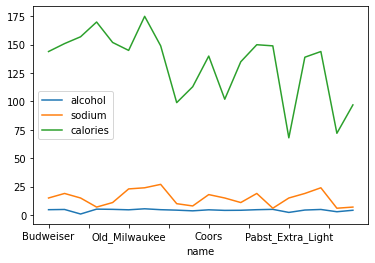

In [104]:
>>> df2.plot(x="name", y=["alcohol", "sodium", "calories"])

In [102]:
df3 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv")

In [103]:
df3

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


In [107]:
df3.Year = pd.to_datetime(df3.Year, format='%Y')

In [108]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                55 non-null     datetime64[ns]
 1   Population          55 non-null     int64         
 2   Total               55 non-null     int64         
 3   Violent             55 non-null     int64         
 4   Property            55 non-null     int64         
 5   Murder              55 non-null     int64         
 6   Forcible_Rape       55 non-null     int64         
 7   Robbery             55 non-null     int64         
 8   Aggravated_assault  55 non-null     int64         
 9   Burglary            55 non-null     int64         
 10  Larceny_Theft       55 non-null     int64         
 11  Vehicle_Theft       55 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.3 KB


In [109]:
df3 = df3.set_index('Year', drop = True)
df3.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [124]:
population = df3['Population'].resample('10AS').max()
df3['Population'] = population
df3

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,1915053175,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,2121193298,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,2371370069,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,2612825258,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,2947969117,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,1570146307,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [125]:
df3.loc[:, ['Murder', 'Robbery']].head()

,Murder,Robbery
Year,,
1960-01-01,106180,1633510
1970-01-01,192230,4159020
1980-01-01,206439,5383109
1990-01-01,211664,5748930
2000-01-01,163068,4230366


In [126]:
df3.loc[df3.index[[3, 4]], ['Murder', 'Robbery']]

,Murder,Robbery
Year,,
1990-01-01,211664,5748930
2000-01-01,163068,4230366


In [127]:
df3[df3['Murder'] > 24000]

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,1915053175,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,2121193298,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,2371370069,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,2612825258,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,2947969117,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,1570146307,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [128]:
df3[df3['Violent'].between(10000000,15000000)]

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1980-01-01,2371370069,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
2000-01-01,2947969117,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834


In [129]:
df3.groupby('Year')['Murder'].mean()

Year
1960-01-01    106180
1970-01-01    192230
1980-01-01    206439
1990-01-01    211664
2000-01-01    163068
2010-01-01     72867
Name: Murder, dtype: int64

In [130]:
df3.sort_values(by=['Murder', 'Violent'], ascending=[False, True])

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1990-01-01,2612825258,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
1980-01-01,2371370069,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1970-01-01,2121193298,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
2000-01-01,2947969117,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
1960-01-01,1915053175,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
2010-01-01,1570146307,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [132]:
df3.pivot_table(index='Year', columns='Violent', values='Murder', aggfunc='mean')

Violent,4134930,6072017,9607930,13968056,14074328,17527048
Year,,,,,,
1960-01-01,106180.0,NaN,NaN,NaN,NaN,NaN
1970-01-01,NaN,NaN,192230.0,NaN,NaN,NaN
1980-01-01,NaN,NaN,NaN,NaN,206439.0,NaN
1990-01-01,NaN,NaN,NaN,NaN,NaN,211664.0
2000-01-01,NaN,NaN,NaN,163068.0,NaN,NaN
2010-01-01,NaN,72867.0,NaN,NaN,NaN,NaN


In [133]:
df4 = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/datasets.csv")

In [134]:
df4

,Package,Item,Title,Rows,Cols,n_binary,n_character,n_factor,n_logical,n_numeric,CSV,Doc
0,AER,Affairs,Fair's Extramarital Affairs Data,601,9,2,0,2,0,7,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1,AER,ArgentinaCPI,Consumer Price Index in Argentina,80,2,0,0,0,0,2,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
2,AER,BankWages,Bank Wages,474,4,2,0,3,0,1,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
3,AER,BenderlyZwick,"Benderly and Zwick Data: Inflation, Growth and...",31,5,0,0,0,0,5,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
4,AER,BondYield,Bond Yield Data,60,2,0,0,0,0,2,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
...,...,...,...,...,...,...,...,...,...,...,...,...
1709,vcd,UKSoccer,UK Soccer Scores,25,3,0,0,2,0,1,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1710,vcd,VisualAcuity,Visual Acuity in Left and Right Eyes,32,4,1,0,3,0,1,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1711,vcd,VonBort,Von Bortkiewicz Horse Kicks Data,280,4,1,0,2,0,2,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1712,vcd,WeldonDice,Weldon's Dice Data,11,2,0,0,1,0,1,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...


In [ ]:
for i in range(len(df4.CSV)):
    d = pd.read_csv(df4.CSV[i][0])
    #d.to_csv("csv"+str(i)+".csv",mode="w")
    #To download all csv files - uncomment the above line

In [153]:
df4.CSV

0       [https://vincentarelbundock.github.io/Rdataset...
1       [https://vincentarelbundock.github.io/Rdataset...
2       [https://vincentarelbundock.github.io/Rdataset...
3       [https://vincentarelbundock.github.io/Rdataset...
4       [https://vincentarelbundock.github.io/Rdataset...
                              ...                        
1709    [https://vincentarelbundock.github.io/Rdataset...
1710    [https://vincentarelbundock.github.io/Rdataset...
1711    [https://vincentarelbundock.github.io/Rdataset...
1712    [https://vincentarelbundock.github.io/Rdataset...
1713    [https://vincentarelbundock.github.io/Rdataset...
Name: CSV, Length: 1714, dtype: object

In [156]:
df4.groupby(['Package']).mean()['n_binary']

Package
AER                1.766355
COUNT              4.809524
DAAG               6.165289
Ecdat              2.067164
HLMdiag            2.000000
HSAUR              0.878049
HistData           1.282609
ISLR               2.000000
KMsurv             3.333333
MASS               0.770115
Stat2Data          1.331754
boot               0.530612
carData            1.761905
causaldata         5.787879
cluster            3.222222
datasets           0.238095
dplyr              0.800000
dragracer          3.000000
drc                0.171429
evir               0.000000
forecast           0.000000
fpp2               0.105263
gap                3.222222
geepack            1.666667
ggplot2            0.272727
ggplot2movies      7.000000
gt                 0.333333
hwde               0.500000
lattice            0.714286
lme4               0.727273
lmec               0.000000
mediation          5.833333
mi                 1.500000
mosaicData        12.193548
multgee            1.500000
nycflights13

In [157]:
df4.rank()

,Package,Item,Title,Rows,Cols,n_binary,n_character,n_factor,n_logical,n_numeric,CSV,Doc
0,54.0,8.0,577.0,1289.0,1317.5,1357.0,758.0,1351.5,847.5,1313.5,1.0,1.0
1,54.0,27.0,289.0,750.0,228.5,484.5,758.0,480.0,847.5,484.5,2.0,2.0
2,54.0,42.0,137.0,1233.0,725.5,1357.0,758.0,1504.0,847.5,192.0,3.0,3.0
3,54.0,51.0,153.0,401.0,909.5,484.5,758.0,480.0,847.5,1109.5,4.0,4.0
4,54.0,65.0,175.0,657.5,228.5,484.5,758.0,480.0,847.5,484.5,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1709,1698.0,704.0,1514.0,325.5,500.5,484.5,758.0,1351.5,847.5,192.0,1710.0,1710.0
1710,1698.0,754.0,1581.0,414.5,725.5,1119.5,758.0,1504.0,847.5,192.0,1711.0,1711.0
1711,1698.0,758.0,1588.0,1117.5,725.5,1119.5,758.0,1351.5,847.5,484.5,1712.0,1712.0
1712,1698.0,774.0,1619.0,107.5,228.5,484.5,758.0,1104.5,847.5,192.0,1713.0,1713.0


In [158]:
df4.median()

Rows           105.5
Cols             5.0
n_binary         0.0
n_character      0.0
n_factor         0.0
n_logical        0.0
n_numeric        3.0
dtype: float64

In [159]:
df4.mode()

,Package,Item,Title,Rows,Cols,n_binary,n_character,n_factor,n_logical,n_numeric,CSV,Doc
0,Stat2Data,Grunfeld,Internal functions for gap,20.0,2.0,0.0,0.0,0.0,0.0,2.0,[https://vincentarelbundock.github.io/Rdataset...,https://vincentarelbundock.github.io/Rdatasets...
1,NaN,Mroz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[https://vincentarelbundock.github.io/Rdataset...,https://vincentarelbundock.github.io/Rdatasets...
2,NaN,housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[https://vincentarelbundock.github.io/Rdataset...,https://vincentarelbundock.github.io/Rdatasets...
3,NaN,salinity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[https://vincentarelbundock.github.io/Rdataset...,https://vincentarelbundock.github.io/Rdatasets...
4,NaN,smoking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[https://vincentarelbundock.github.io/Rdataset...,https://vincentarelbundock.github.io/Rdatasets...
...,...,...,...,...,...,...,...,...,...,...,...,...
1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[https://vincentarelbundock.github.io/Rdataset...,https://vincentarelbundock.github.io/Rdatasets...
1710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[https://vincentarelbundock.github.io/Rdataset...,https://vincentarelbundock.github.io/Rdatasets...
1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[https://vincentarelbundock.github.io/Rdataset...,https://vincentarelbundock.github.io/Rdatasets...
1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[https://vincentarelbundock.github.io/Rdataset...,https://vincentarelbundock.github.io/Rdatasets...


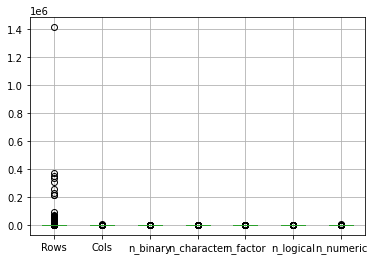

In [161]:
df4.boxplot()

In [163]:
df4.swapaxes("index","columns")

,0,1,2,3,4,5,6,7,8,9,...,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713
Package,AER,AER,AER,AER,AER,AER,AER,AER,AER,AER,...,vcd,vcd,vcd,vcd,vcd,vcd,vcd,vcd,vcd,vcd
Item,Affairs,ArgentinaCPI,BankWages,BenderlyZwick,BondYield,CartelStability,CASchools,ChinaIncome,CigarettesB,CigarettesSW,...,Saxony,SexualFun,SpaceShuttle,Suicide,Trucks,UKSoccer,VisualAcuity,VonBort,WeldonDice,WomenQueue
Title,Fair's Extramarital Affairs Data,Consumer Price Index in Argentina,Bank Wages,"Benderly and Zwick Data: Inflation, Growth and...",Bond Yield Data,CartelStability,California Test Score Data,Chinese Real National Income Data,Cigarette Consumption Data,Cigarette Consumption Panel Data,...,Families in Saxony,Sex is Fun,Space Shuttle O-ring Failures,Suicide Rates in Germany,Truck Accidents Data,UK Soccer Scores,Visual Acuity in Left and Right Eyes,Von Bortkiewicz Horse Kicks Data,Weldon's Dice Data,Women in Queues
Rows,601,80,474,31,60,328,420,37,46,96,...,13,16,24,306,24,25,32,280,11,11
Cols,9,2,4,5,2,5,14,5,3,9,...,2,3,6,6,5,3,4,4,2,2
n_binary,2,0,2,0,0,2,1,0,0,2,...,0,0,1,1,3,0,1,1,0,0
n_character,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n_factor,2,0,3,0,0,3,2,0,0,2,...,1,2,2,4,4,2,3,2,1,1
n_logical,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n_numeric,7,2,1,5,2,2,10,5,3,7,...,1,1,4,2,1,1,1,2,1,1
